In [1]:
# Import Tensorflow & Pathlib librairies
import tensorflow as tf
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import os
import io
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

import en_core_web_sm
from spacy.lang.fr.stop_words import STOP_WORDS
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense


In [2]:


dataset = pd.read_csv("https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Deep+Learning/project/spam.csv", on_bad_lines='skip', encoding="latin-1")
dataset.head(20)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [8]:
dataset.shape


(5572, 5)


#Surprising : the 3 last columns has most 'Nan' values...let's examine the percentage of missing values of each columnn   


In [9]:
MissingValue = dataset.notna().sum()

print(MissingValue)



v1            5572
v2            5572
Unnamed: 2      50
Unnamed: 3      12
Unnamed: 4       6
dtype: int64


In [10]:
#Lets analyse first the precised values in the last colums

Precision = dataset [dataset["Unnamed: 2"].notna() | dataset["Unnamed: 3"].notna() | dataset["Unnamed: 4"].notna()]

Precision.head(80)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
444,ham,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...,HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...,NaN,NaN
671,spam,SMS. ac sun0819 posts HELLO:\You seem cool,"wanted to say hi. HI!!!\"" Stop? Send STOP to ...",NaN,NaN
710,ham,Height of Confidence: All the Aeronautics prof...,"this wont even start........ Datz confidence..""",NaN,NaN
899,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
1127,ham,"Height of \Oh shit....!!\"" situation: A guy th...",".;-):-D""",NaN,NaN
1266,ham,\Hey sorry I didntgive ya a a bellearlier hunny,just been in bedbut mite go 2 thepub l8tr if u...,NaN,NaN
1384,ham,"Storming msg: Wen u lift d phne, u say \HELLO\...","bt not his girlfrnd... G o o d n i g h t . . .@""",NaN,NaN


In [3]:
#It appears that the filled-in rows correspond either to additions following the main message, or to references such as P.O. boxes, locations, or other types of information.
#So we can concatenate them with the main message
cols_to_concat = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
dataset[cols_to_concat] = dataset[cols_to_concat].fillna('')

# On crée une nouvelle colonne en concaténant Col1 avec toutes les valeurs non vides de Col2, Col3, Col4
dataset["Text"] = dataset["v2"] + " " + dataset[cols_to_concat].agg(' '.join, axis=1)

# Optionnel : on peut aussi retirer les doublons d'espaces
dataset["Text"] = dataset["Text"].str.replace(r'\s+', ' ', regex=True).str.strip()

dataset


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Text
0,ham,"Go until jurong point, crazy.. Available only ...",,,,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...,,,,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,,,,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,,,,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?,,,,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s...",,,,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...,,,,The guy did some bitching but I acted like i'd...


These 3 columns can be dropped and the first one renamed

In [4]:
dataset = dataset.drop(dataset.columns[[1, 2, 3, 4]], axis=1)
dataset = dataset.rename(columns={'v1': 'Target'})

display(dataset)

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


PART EDA

In [13]:
print("Number of duplicate rows: ",dataset.duplicated().sum())

Number of duplicate rows:  414


In [5]:
dataset= dataset.drop_duplicates()
dataset.shape

(5158, 2)

Target
ham     4516
spam     642
Name: count, dtype: int64


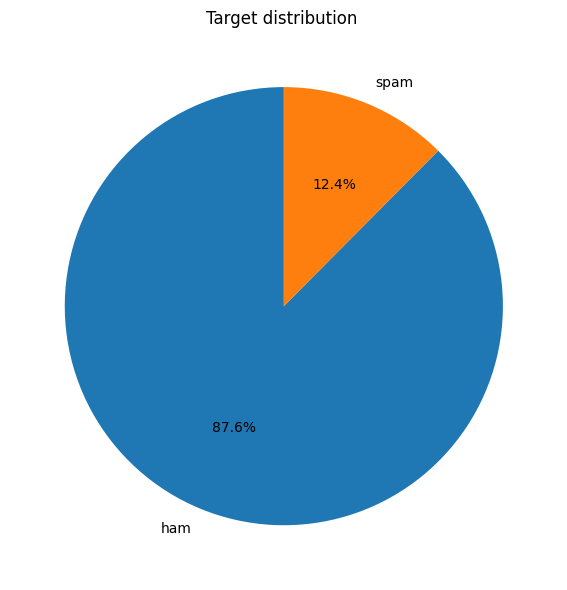

The dataset is quite imbalanced


In [15]:
df=dataset['Target'].value_counts()
print(df)



# Spam distribution

labels = df.index.tolist() # creates a list of labels (0 and 1)
sizes = df.values.tolist() # creates a list of the 0 and 1 counts
# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Target distribution ")
# Display the plot
plt.tight_layout()
plt.show()
print("The dataset is quite imbalanced")

In [16]:
#length of the text for ham and spam

dataset["text_length"] = dataset["Text"].apply(len)

fig = px.histogram(dataset, "text_length", color="Target", barmode="overlay")
fig.show()


Most **spam** messages are between **135 and 160** characters long.<br>

Most **ham** messages are between **20 and 40** characters long.

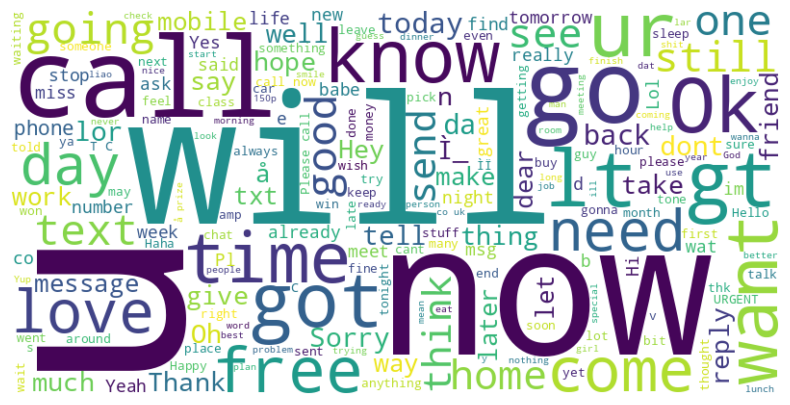

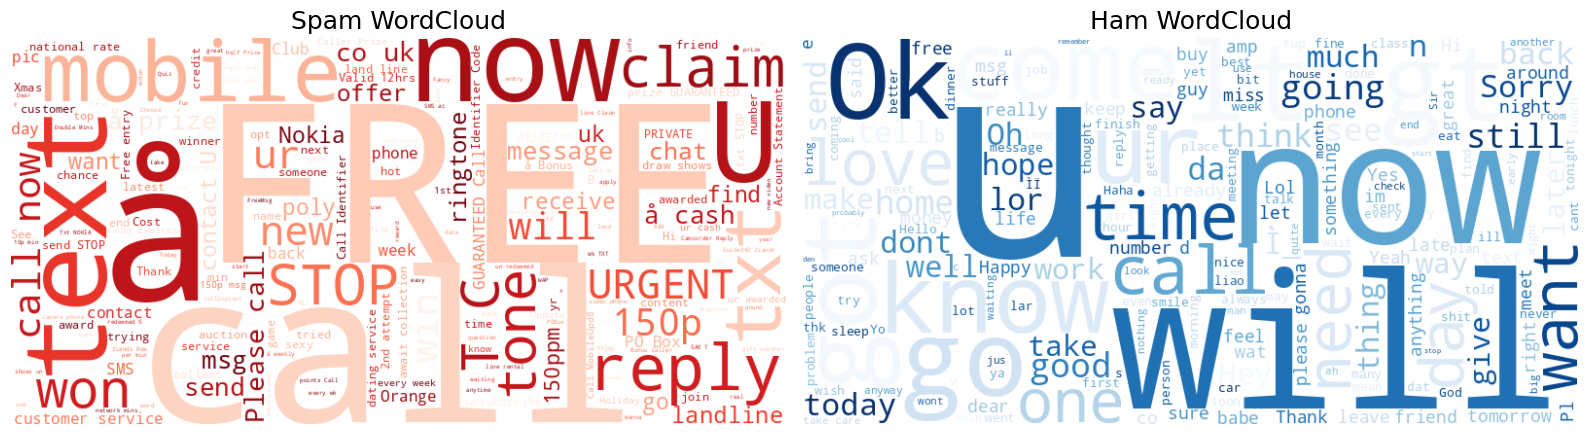

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Display the worldcloud for the whole datframe
wd = WordCloud(width=800, height=400, background_color='white')
cloud = wd.generate(' '.join(dataset['Text']))

#  Display the worldcloud
plt.figure(figsize=(10, 5))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()



# Then we can crealoud for each target/ type of text
spam_text = ' '.join(dataset[dataset['Target'] == 'spam']['Text'])
ham_text = ' '.join(dataset[dataset['Target'] == 'ham']['Text'])


spam_wc = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(spam_text)
ham_wc = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(ham_text)


plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Spam WordCloud', fontsize=18)

plt.subplot(1, 2, 2)
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Ham WordCloud', fontsize=18)

plt.tight_layout()
plt.show()







By comparing each specific word cloud with the global one, we can observe that the most frequent words differ between the two types of messages — this reflects the fact that they serve different purposes.<br>

We also notice that the global word cloud contains many more words from ham messages, which can be explained by the imbalance in the number of spam and ham messages."



PREPROCESSING

In [6]:
!python -m spacy download en_core_web_sm -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 75.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [7]:
import en_core_web_sm
nlp = en_core_web_sm.load()

# Import Stop words
from spacy.lang.en.stop_words import STOP_WORDS

In [8]:

# Remove all non alphanumeric characters except whitespaces :
dataset["text_clean"] = dataset["Text"].apply(lambda x:''.join(ch for ch in x if ch.isalnum() or ch==" "))

# removing double spaces and spaces at the beginning and end of strings :
dataset["text_clean"] = dataset["text_clean"].apply(lambda x: x.replace(" +"," ").lower().strip())

# removing stop words and replacing every word with their lemma :
dataset["text_clean"] = dataset["text_clean"].apply(lambda x: " ".join([token.lemma_ for token in nlp(x) if (token.lemma_ not in STOP_WORDS) & (token.text not in STOP_WORDS)]))

In [9]:
dataset.head()

,Target,Text,text_clean
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis n great wor...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun early hor u c
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think usf live


In [10]:
#TOKENIZE

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=1000, oov_token="out_of_vocab") # instanciate the tokenizer
tokenizer.fit_on_texts(dataset.text_clean)
dataset["text_tokenized"] = tokenizer.texts_to_sequences(dataset.text_clean)

# Labeling the target column :
dataset['Target_id'] = dataset['Target'].map({'ham':0,'spam':1})

In [11]:
dataset.head(100
             )

,Target,Text,text_clean,text_tokenized,Target_id
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis n great wor...,"[1, 214, 411, 485, 853, 34, 55, 263, 854, 75, ...",0
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[12, 174, 1, 264, 2, 1]",0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[15, 335, 4, 708, 709, 45, 1, 985, 486, 1, 1, ...",1
3,ham,U dun say so early hor... U c already then say...,u dun early hor u c,"[2, 115, 137, 1, 2, 84]",0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think usf live,"[662, 22, 600, 154]",0
...,...,...,...,...,...
95,spam,Your free ringtone is waiting to be collected....,free ringtone wait collect simply text passwor...,"[15, 267, 52, 245, 1, 21, 1, 1, 1, 1, 1, 1, 1,...",1
96,ham,Watching telugu movie..wat abt u?,watch telugu moviewat abt u,"[100, 1, 1, 275, 2]",0
97,ham,i see. When we finish we have loads of loans t...,finish load loan pay,"[94, 612, 718, 133]",0
98,ham,Hi. Wk been ok - on hols now! Yes on for a bit...,hi wk ok hol yes bit run forgot hairdresser ...,"[33, 302, 12, 1, 78, 145, 206, 1, 1, 1, 24, 26...",0


In [12]:
#PADDING

# Apply padding to the tokenized text :
text_padded = tf.keras.preprocessing.sequence.pad_sequences(dataset["text_tokenized"], padding="post")

print(text_padded.shape)
text_padded


(5158, 72)


array([[  1, 214, 411, ...,   0,   0,   0],
       [ 12, 174,   1, ...,   0,   0,   0],
       [ 15, 335,   4, ...,   0,   0,   0],
       ...,
       [  1,   1,   1, ...,   0,   0,   0],
       [107,   1,   1, ...,   0,   0,   0],
       [  1, 344,   0, ...,   0,   0,   0]], dtype=int32)

In [13]:
# Train Test Split

X_train, X_val, Y_train, Y_val = train_test_split(text_padded,dataset['Target_id'], test_size=0.3)


In [14]:
# Now that your sequences are padded create the tensor dataset for the training, and validation set. The target variable is qualitative ordinal, this means you may treat the sentiment analysis problem as a regression problem.

train = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
val = tf.data.Dataset.from_tensor_slices((X_val, Y_val))

# Shuffle and batch the datasets
batch_size = 64
train_batch = train.shuffle(buffer_size=len(train)).batch(batch_size)
val_batch = val.shuffle(buffer_size=len(val)).batch(batch_size)

# Look at a batch of data

for review, value in train_batch.take(1):
  print(review, value)



tf.Tensor(
[[146 115 376 ...   0   0   0]
 [445  25   0 ...   0   0   0]
 [  1   1 200 ...   0   0   0]
 ...
 [  3  26   0 ...   0   0   0]
 [  1 412 681 ...   0   0   0]
 [  1   0   0 ...   0   0   0]], shape=(64, 72), dtype=int32) tf.Tensor(
[0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0], shape=(64,), dtype=int64)


#  **Models** <br>
**We start first with a simple model : **
 # Embedding

In [27]:
vocab_size = tokenizer.num_words # the number of words in the vocabulary
embedding_dim= 16
model = Sequential([
                  Embedding(vocab_size+1, embedding_dim,input_shape=[review.shape[1],], name="embedding"), # +1 for the padding value 0
                  GlobalAveragePooling1D(), # this will pick the average for every word in the sentence
                  Dense(64, activation='relu'),
                  Dense(32, activation='relu'),
                  Dense(8, activation='relu'),
                  Dense(1, activation="sigmoid") ])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 72, 16)         │        16,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,457 (76.00 KB)

 Trainable params: 19,457 (76.00 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Fitting the model
history = model.fit(train_batch,
                    epochs=50,
                    validation_data=val_batch)

Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8083 - loss: 0.5561 - val_accuracy: 0.8708 - val_loss: 0.3591
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8702 - loss: 0.3605 - val_accuracy: 0.8708 - val_loss: 0.3541
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8674 - loss: 0.3613 - val_accuracy: 0.8708 - val_loss: 0.3501
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8785 - loss: 0.3359 - val_accuracy: 0.8708 - val_loss: 0.3443
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8750 - loss: 0.3373 - val_accuracy: 0.8708 - val_loss: 0.3342
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8790 - loss: 0.3199 - val_accuracy: 0.8708 - val_loss: 0.3146
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8845 - loss: 0.2927 - val_accuracy: 0.8708 - val_loss: 0.2736
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8829 - loss: 0.2493 - val_accuracy: 0.9076 - val_loss

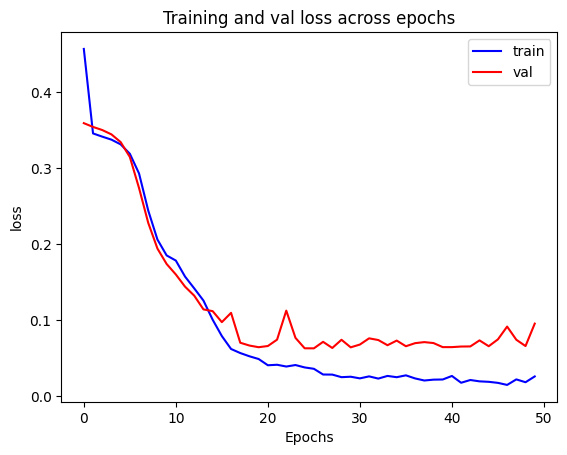

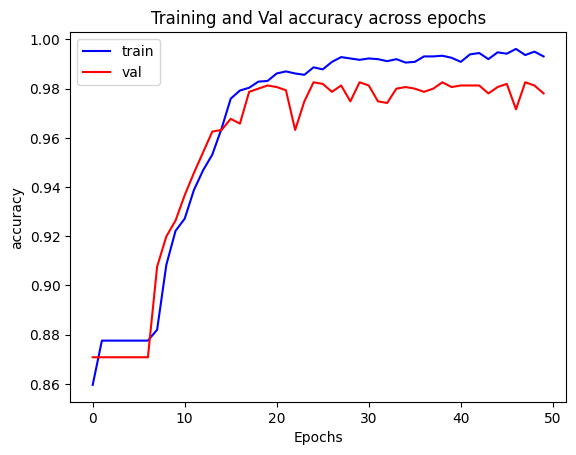

In [29]:
import matplotlib.pyplot as plt

# Visualization of the training process on the loss function
plt.plot(history.history["loss"], color="b")
plt.plot(history.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.legend(["train", "val"])
plt.title("Training and val loss across epochs")
plt.show()

plt.plot(history.history["accuracy"], color="b")
plt.plot(history.history["val_accuracy"], color="r")
plt.ylabel("accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "val"])
plt.title("Training and Val accuracy across epochs")
plt.show()



In [30]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_batch)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9811 - loss: 0.0846 
Validation Loss: 0.0950862392783165
Validation Accuracy: 0.9780361652374268


In [31]:
# saving the model :
model.save('/content/drive/MyDrive/FULLSTACK/PROJET/6. A&T SPAM Detector/spam_detector_modelEmbedding.keras')

**Conclusion:**<br>
We observe a progressive improvement in the model’s performance: starting from an accuracy of 87% at epoch 1, it increases steadily to reach 99% by epoch 22. From that point on, the accuracy remains consistently between 98% and 99%, eventually reaching 99.4% at the final epoch.

There is also little divergence between the training and validation results, with a loss difference of only around 1%. This suggests good generalization.

However, a growing gap between training and validation becomes noticeable from epoch 44 onward, as the validation loss starts to increase (e.g., from 0.084 to 0.121).
→ This could indicate the onset of overfitting, where the model begins to memorize the training data too closely.

Now we can test other models as GRU and BERT — or even apply early stopping or dropout — to see if the final convergence  is confirmed.





In [32]:
from tensorflow.keras.layers import  Bidirectional, GRU, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences

#MODEL GRU

In [33]:
model_GRU = Sequential([
    Embedding(vocab_size, embedding_dim, input_shape=[review.shape[1],], name="embedding"),
    Bidirectional(GRU(64, return_sequences=True)),
    Bidirectional(GRU(32, return_sequences=False)),

    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])



In [34]:
model_GRU.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_GRU.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 72, 16)         │        16,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 72, 128)        │        31,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        31,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,705 (315.25 KB)

 Trainable params: 80,705 (315.25 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
history_GRU = model_GRU.fit(train_batch,epochs=50,
                    validation_data=val_batch)




Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 23s 226ms/step - accuracy: 0.8742 - loss: 0.4516 - val_accuracy: 0.9444 - val_loss: 0.1750
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 209ms/step - accuracy: 0.9606 - loss: 0.1334 - val_accuracy: 0.9742 - val_loss: 0.0886
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 19s 177ms/step - accuracy: 0.9878 - loss: 0.0474 - val_accuracy: 0.9748 - val_loss: 0.0818
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 210ms/step - accuracy: 0.9926 - loss: 0.0294 - val_accuracy: 0.9774 - val_loss: 0.0829
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 210ms/step - accuracy: 0.9933 - loss: 0.0244 - val_accuracy: 0.9729 - val_loss: 0.1111
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 209ms/step - accuracy: 0.9923 - loss: 0.0248 - val_accuracy: 0.9748 - val_loss: 0.0864
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 211ms/step - accuracy: 0.9947 - loss: 0.0180 - val_accuracy: 0.9716 - val_loss: 0.1062
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 176ms/step - accuracy: 0.9975 - loss: 0.0139 - val_accu

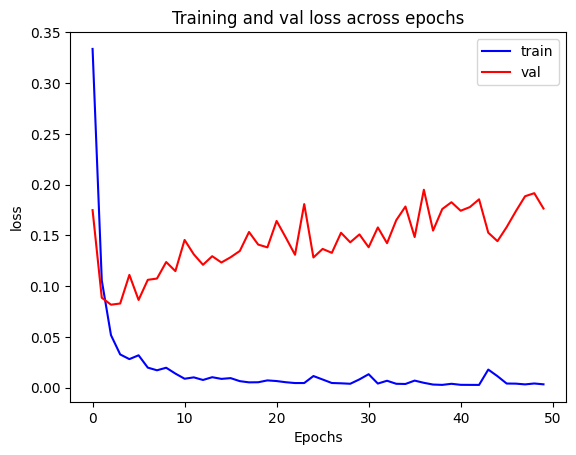

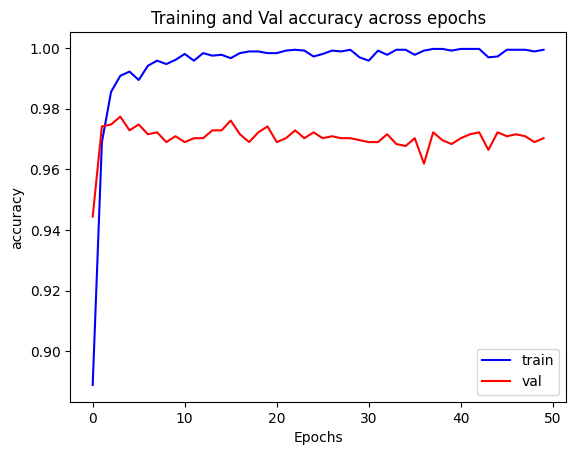

In [36]:
import matplotlib.pyplot as plt

# Visualization of the training process on the loss function
plt.plot(history_GRU.history["loss"], color="b")
plt.plot(history_GRU.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.legend(["train", "val"])
plt.title("Training and val loss across epochs")
plt.show()

plt.plot(history_GRU.history["accuracy"], color="b")
plt.plot(history_GRU.history["val_accuracy"], color="r")
plt.ylabel("accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "val"])
plt.title("Training and Val accuracy across epochs")
plt.show()

In [37]:
# saving the model :
model_GRU.save('/content/drive/MyDrive/FULLSTACK/PROJET/6. A&T SPAM Detector/spam_detector_modelGRU.keras')

**Conclusion:**<br>
The accuracy increases from 83% to over 99% by epoch 12 and remains steady thereafter, which reflects strong performance on the training set.

Additionally, the validation accuracy reaches 98% and stays stable up to epoch 47. However, the slight drop in validation accuracy and the growing gap between validation accuracy and training accuracy in the final epochs suggest potential overfitting.

Moreover, the validation loss gradually increases starting from epoch 17, before decreasing again toward the end.

The model learns effectively and reaches its optimal performance around epoch 16. Continuing training beyond this point raises concerns about overfitting. Implementing EarlyStopping would therefore be strongly recommended.

#MODEL BERT


In [40]:
!pip install --upgrade tensorflow==2.15.0
!pip install --upgrade tensorflow_hub==0.15.0
!pip install --upgrade tensorflow_text==2.15.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 101.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uni

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: tensorflow_hub
    Found existing installation: tensorflow-hub 0.16.1
    Uninstalling tensorflow-hub-0.16.1:
      Successfully uninstalled tensorflow-hub-0.16.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 94.9 MB/s eta 0:00:00
  Attempting uninstall: tensorflow_text
    Found existing installation: tensorflow-text 2.18.1
    Uninstalling tensorflow-text-2.18.1:
      Successfully uninstalled tensorflow-text-2.18.1


In [15]:
# Train test split
X_train, X_val, y_train, y_val = train_test_split(dataset['text_clean'], dataset['Target_id'], test_size=0.3)

train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val = tf.data.Dataset.from_tensor_slices((X_val, y_val))

train_batch = train.shuffle(len(train)).batch(64)
val_batch = val.shuffle(len(val)).batch(64)

In [16]:
import tensorflow_hub as hub
import tensorflow_text

text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
preprocessor = hub.KerasLayer(
    "https://kaggle.com/models/tensorflow/bert/frameworks/TensorFlow2/variations/en-uncased-preprocess/versions/3")
encoder_inputs = preprocessor(text_input)
encoder = hub.KerasLayer(
    "https://www.kaggle.com/models/tensorflow/bert/frameworks/TensorFlow2/variations/bert-en-uncased-l-2-h-128-a-2/versions/2",
    trainable=False)
outputs = encoder(encoder_inputs)
pooled_output = outputs["pooled_output"]      # [batch_size, 768]
sequence_output = outputs["sequence_output"]  # [batch_size, seq_length, 768]

out = tf.keras.layers.Dropout(0.2,name='dropout')(pooled_output)
out = tf.keras.layers.Dense(16,activation='relu')(out)
out = tf.keras.layers.Dense(1,activation='sigmoid',name='output')(out)

model_bert=tf.keras.Model(inputs=[text_input],outputs=[out])

model_bert.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_bert = model_bert.fit(train_batch,
                    epochs=50,
                    validation_data=val_batch)

Epoch 1/50
57/57 [==============================] - 25s 377ms/step - loss: 0.4024 - accuracy: 0.8537 - val_loss: 0.3218 - val_accuracy: 0.8656
Epoch 2/50
57/57 [==============================] - 21s 361ms/step - loss: 0.2400 - accuracy: 0.8967 - val_loss: 0.2079 - val_accuracy: 0.9186
Epoch 3/50
57/57 [==============================] - 21s 375ms/step - loss: 0.1705 - accuracy: 0.9338 - val_loss: 0.1784 - val_accuracy: 0.9296
Epoch 4/50
57/57 [==============================] - 22s 382ms/step - loss: 0.1455 - accuracy: 0.9438 - val_loss: 0.1700 - val_accuracy: 0.9322
Epoch 5/50
57/57 [==============================] - 20s 356ms/step - loss: 0.1348 - accuracy: 0.9476 - val_loss: 0.1614 - val_accuracy: 0.9399
Epoch 6/50
57/57 [==============================] - 22s 386ms/step - loss: 0.1287 - accuracy: 0.9546 - val_loss: 0.1564 - val_accuracy: 0.9432
Epoch 7/50
57/57 [==============================] - 22s 385ms/step - loss: 0.1249 - accuracy: 0.9562 - val_loss: 0.1540 - val_accuracy: 0.9438

In [17]:
# saving the model :
model_bert.save('/content/drive/MyDrive/FULLSTACK/PROJET/6. A&T SPAM Detector/spam_detector_modelBert.keras')

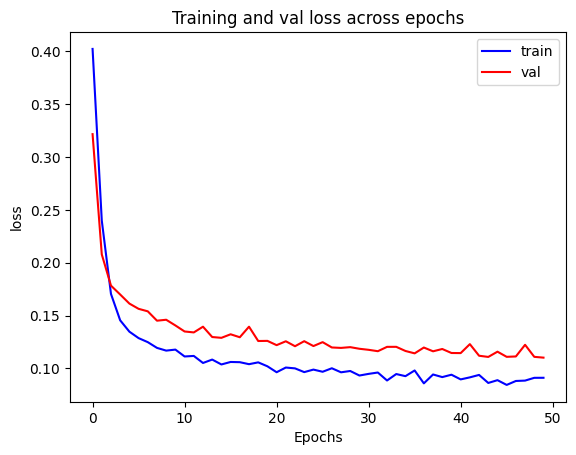

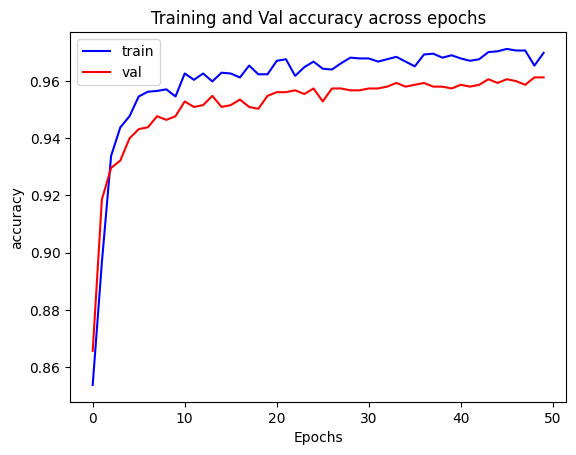

In [18]:
import matplotlib.pyplot as plt

# Visualization of the training process on the loss function
plt.plot(history_bert.history["loss"], color="b")
plt.plot(history_bert.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.legend(["train", "val"])
plt.title("Training and val loss across epochs")
plt.show()

plt.plot(history_bert.history["accuracy"], color="b")
plt.plot(history_bert.history["val_accuracy"], color="r")
plt.ylabel("accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "val"])
plt.title("Training and Val accuracy across epochs")
plt.show()

**Conclusion :** <br>
This model BERT is highly effective, stable, and generalizes well.
Indeed, both the training and validation accuracy evolve similarly, gradually increasing from 0.87 to 0.97 (around 0.95 for validation). The gap between training and validation accuracy remains constant throughout the training, showing no signs of overfitting.

Both the training loss and validation loss also decrease consistently, reaching their minimum at the final epoch (epoch 50).

**→ This latest BERT-based model delivers better result**s than the GRU model and **does not show the overfitting risk **observed with the Embedding-based model.

